In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# import os
# os.chdir("/content/drive/")

In [3]:
# %cd MyDrive/Colab Notebooks/Room Classification

In [4]:
import numpy as np
from tensorflow.keras.models import load_model
import tensorflow_hub as hub
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
with np.load('batches/test_set.npz') as data:
    X_test = data['X_test']
    y_test = data['y_test']

In [7]:
def aggregate_predictions(y_predicted_labels_lst):
    transpose_lst = np.transpose(y_predicted_labels_lst)
    aggregate_predicted_labels = []
    for row in transpose_lst:
        aggregate_predicted_labels.append((np.bincount(row).argmax()))
    return aggregate_predicted_labels

In [8]:
def load_models(model_path, indices):
    models = []
    for i in indices:
        models.append(load_model('bagging_models/model_' + str(i) + '.h5', custom_objects={'KerasLayer': hub.KerasLayer}))
    return models

In [12]:
models = load_models('bagging_models', range(1, 11))

## Try "most-predicted label" ensembling method

In [9]:
def models_predictions(models, X_test):
    y_predictions = []
    for model in models:
        y_predict = model.predict(X_test)
        y_predictions.append([np.argmax(y) for y in y_predict])
    y_predictions = np.array(y_predictions)
    print(y_predictions)
    return y_predictions

In [11]:
y_predictions = models_predictions(models, X_test)

[[6 2 2 ... 4 0 4]
 [1 2 2 ... 4 0 4]
 [1 2 2 ... 4 0 4]
 ...
 [1 2 2 ... 4 0 4]
 [1 2 2 ... 4 0 4]
 [6 2 2 ... 4 0 4]]


In [12]:
y_predictions.shape

(10, 7000)

In [13]:
aggregate_predicted_labels = aggregate_predictions(y_predictions)

In [14]:
np.array(aggregate_predicted_labels).shape

(7000,)

In [15]:
y_test

array([6, 2, 2, ..., 4, 0, 4])

In [16]:
accuracy = sum(aggregate_predicted_labels == y_test)/len(y_test)
print(accuracy)

0.853


## Try another ensembling method

In [13]:
def models_predictions_2(models, X_test):
    y_predictions = []
    for model in models:
        y_predictions.append(model.predict(X_test))
    y_predictions = np.sum(y_predictions, axis=0)
    y_predictions = np.array([np.argmax(y) for y in y_predictions])
    return y_predictions

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_predictions = models_predictions_2(models, X_test)

In [16]:
accuracy_score(y_test, y_predictions)

0.8532857142857143

# Confusion Matrix

In [17]:
from tensorflow.math import confusion_matrix
cm = confusion_matrix(y_test, y_predictions, num_classes=7)
cm

<tf.Tensor: shape=(7, 7), dtype=int32, numpy=
array([[ 928,   13,    5,    3,   16,   36,   14],
       [  36,  943,   14,    3,   12,   13,   99],
       [   2,    7,  729,    2,   25,   47,   78],
       [   5,    4,    8, 1006,   43,    2,    7],
       [   9,    5,   25,   45,  797,    8,   26],
       [  51,    6,   62,    0,   10,  903,   23],
       [  19,   79,   95,    8,   32,   30,  667]])>

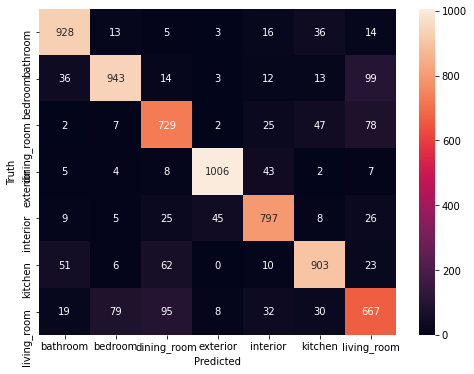

In [18]:
import seaborn as sns
from matplotlib import pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.xticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], labels=['bathroom', 'bedroom', 'dining_room', 'exterior', 'interior', 'kitchen', 'living_room'])
plt.yticks(ticks=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5], labels=['bathroom', 'bedroom', 'dining_room', 'exterior', 'interior', 'kitchen', 'living_room'])
plt.show()

# Test with .JPG picture imported through URL

In [25]:
from urllib.request import urlretrieve
import PIL
import cv2
def classify_from_URL(url):
  urlretrieve(url, "sample.jpg")
  x = cv2.imread("sample.jpg")
  x_test = cv2.resize(x,(240,240,))
  x_test = x_test/255
  label_lst = ['bathroom', 'bedroom', 'dining_room', 'exterior', 'interior', 'kitchen', 'living_room']
  y_pred = models_predictions_2(models,np.array([x_test.tolist()]))
#   print(y_pred)
  y_predict_label = label_lst[y_pred[0]]
  plt.matshow(x_test)
  plt.xlabel(y_predict_label)

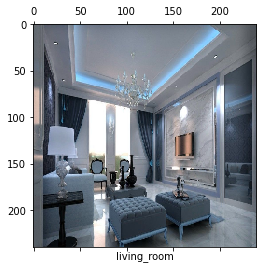

In [26]:
classify_from_URL('https://i.pinimg.com/originals/22/63/3c/22633cd4dc4b98fe248d224475d54b88.jpg')

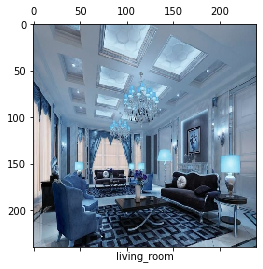

In [27]:
classify_from_URL('https://i.pinimg.com/originals/25/e1/44/25e14431a38ddf44c095934a15ce9397.jpg')

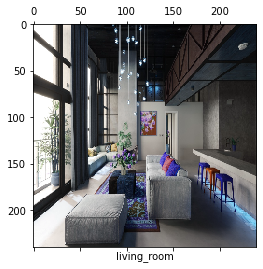

In [28]:
classify_from_URL('https://cdn.home-designing.com/wp-content/uploads/2018/01/flying-pendant-lights-colourful-stools-kitsch-living-room.jpg')

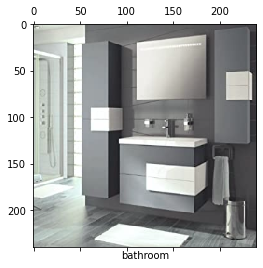

In [29]:
classify_from_URL('https://images-na.ssl-images-amazon.com/images/I/41WoO28JijL._AC_SX355_.jpg')

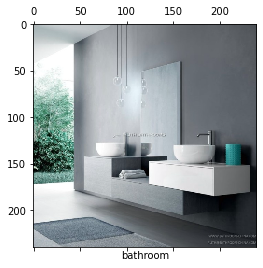

In [30]:
classify_from_URL('https://www.bathroom-china.com/wp-content/uploads/2015/12/AL05-220-650x650.jpg')

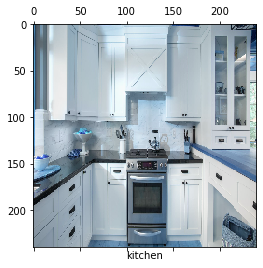

In [31]:
classify_from_URL('https://www.thespruce.com/thmb/8RCePpPsuO0_68hbfw3a0ZLY1sc=/2121x1193/smart/filters:no_upscale()/Whitemodernkitchen-GettyImages-1089101352-4eddd67a46984affa521c889b02c5bf1.jpg')

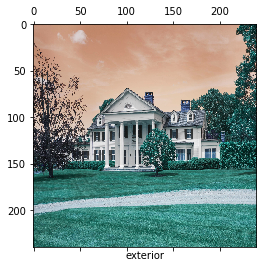

In [32]:
classify_from_URL('https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/lynnestair-exterior-hudsonvalley-veranda-jpg-1565722565.jpg')

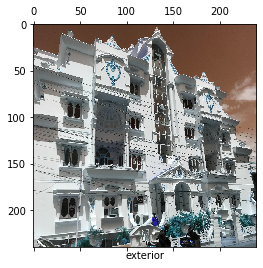

In [33]:
classify_from_URL('https://upload.wikimedia.org/wikipedia/commons/5/5d/Beautiful_exterior_building_design.jpg')

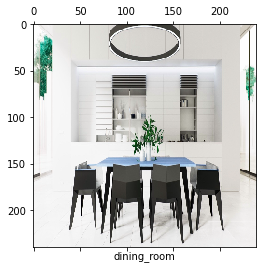

In [34]:
classify_from_URL('https://cdn.home-designing.com/wp-content/uploads/2017/04/black-and-white-modern-dining-room.jpg')

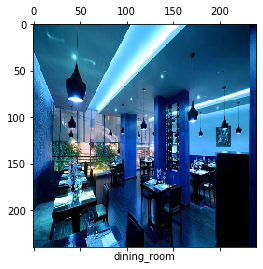

In [35]:
classify_from_URL('https://media.foody.vn/res/g10/96526/prof/s/foody-mobile-qb6jz3ob-jpg-254-635878456357298802.jpg')

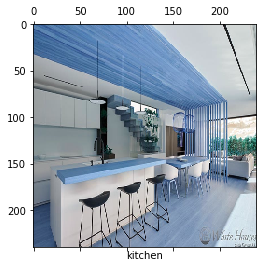

In [36]:
classify_from_URL('https://www.contemporist.com/wp-content/uploads/2020/01/modern-wood-white-kitchen-dining-150120-1154-01.jpg')

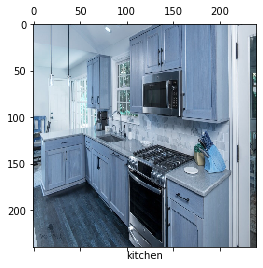

In [37]:
classify_from_URL('https://static1.squarespace.com/static/5212c2c8e4b0c307574854ec/t/5db8378a8af28129ea4b3116/1572353933337/Mastay+kitchen+design+4_web-min.jpg?format=1500w')

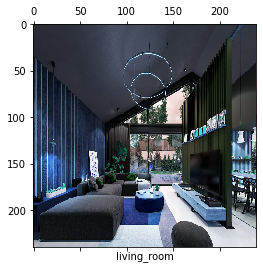

In [38]:
classify_from_URL('https://cdn.home-designing.com/wp-content/uploads/2019/04/living-room-pendant-light.jpg')

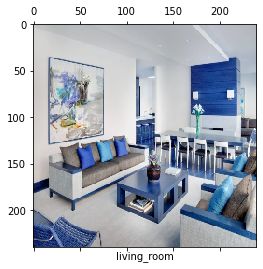

In [39]:
classify_from_URL('https://www.mymove.com/wp-content/uploads/2020/07/GettyImages-523468730.jpg')

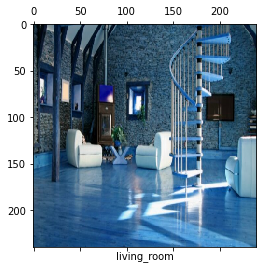

In [40]:
classify_from_URL('https://assets-news.housing.com/news/wp-content/uploads/2020/04/22184310/Check-out-these-duplex-interior-design-ideas-FB-1200x700-compressed-686x400.jpg')

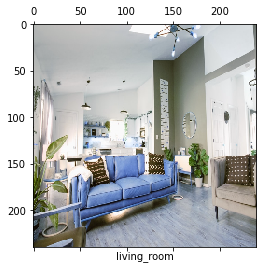

In [41]:
classify_from_URL('https://images.unsplash.com/photo-1554995207-c18c203602cb?ixid=MXwxMjA3fDB8MHxzZWFyY2h8NHx8aW50ZXJpb3J8ZW58MHx8MHw%3D&ixlib=rb-1.2.1&w=1000&q=80')

# Test with picture import from local machine

In [59]:
def classify(picture):
  img = cv2.imread(picture)
  img_resized = cv2.resize(img, (240,240,))
  img_resized = img_resized/255
  label_lst = ['bathroom', 'bedroom', 'dining_room', 'exterior', 'interior', 'kitchen', 'living_room']
  y_pred = models_predictions_2(models,np.array([img_resized.tolist()]))
  print(y_pred)
  y_predict_label = label_lst[y_pred[0]]
  plt.matshow(img_resized)
  plt.xlabel(y_predict_label)

In [67]:
# from google.colab import files

In [68]:
# def upload_picture():
#   uploaded = files.upload()
#   for fn in uploaded.keys():
#     classify(fn)

In [69]:
# upload_picture()

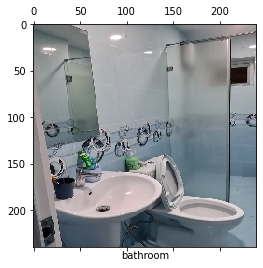

In [49]:
classify('real_image/nhatam_1.jpg')

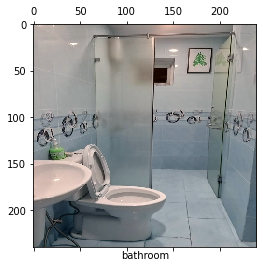

In [50]:
classify('real_image/nhatam_2.jpg')

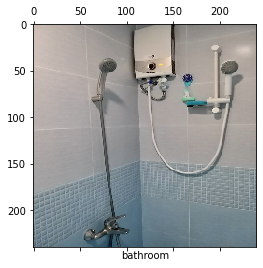

In [51]:
classify('real_image/nhatam_3.jpg')

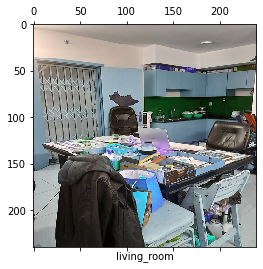

In [52]:
classify('real_image/phongkhach_1.jpg')

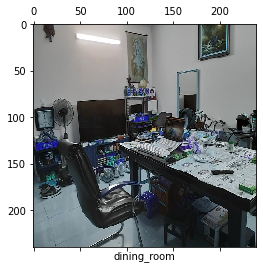

In [53]:
classify('real_image/phongkhach_2.jpg')

[6]


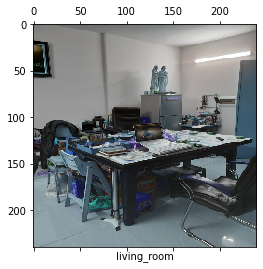

In [60]:
classify('real_image/phongkhach_3.jpg')